# SWMAL Assignment 01
This notebook consists of five combined exercises from L01 and L02, which is required for assignment O1.

## L01 - Intro

_Below code is the code used to generate some of the figures in chapter 1._

Afterwards a list of questions will be answered.

### Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [3]:
import os
datapath = os.path.join("datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#

! dir

print("\nOK")

 Volume in drive C is d
 Volume Serial Number is 42C2-DCF0

 Directory of c:\Users\Thomas\Documents\GitHub\5-Semester\MAL\L01

02/13/2024  09:54 PM    <DIR>          .
02/13/2024  09:54 PM    <DIR>          ..
02/04/2024  07:52 PM    <DIR>          .ipynb_checkpoints
02/13/2024  10:18 PM           334,676 Combined final assignment.ipynb
02/13/2024  09:54 PM    <DIR>          data
02/04/2024  07:52 PM    <DIR>          datasets
02/13/2024  09:38 PM    <DIR>          extraUtils
02/13/2024  08:56 PM           106,399 intro.ipynb
02/13/2024  08:56 PM           248,639 intro_assignment.ipynb
02/13/2024  09:38 PM    <DIR>          libitmal
02/04/2024  07:52 PM            13,391 modules_and_classes.ipynb
02/13/2024  08:56 PM             6,292 modules_and_classes_assignment.ipynb
               5 File(s)        709,397 bytes
               7 Dir(s)  19,089,547,264 bytes free

OK


C:\Users\Thomas\AppData\Local\Temp\ipykernel_1684\2677927476.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


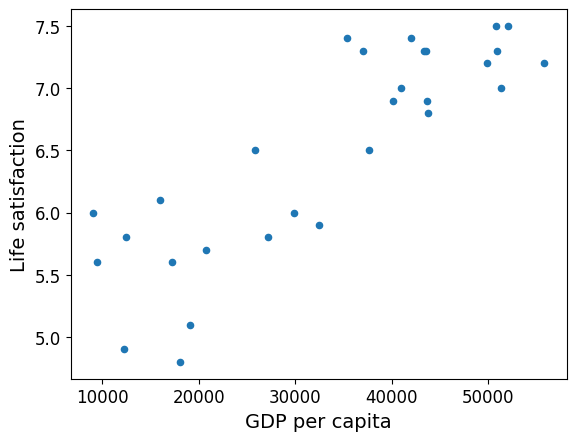

[[5.96242338]]
OK


In [4]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

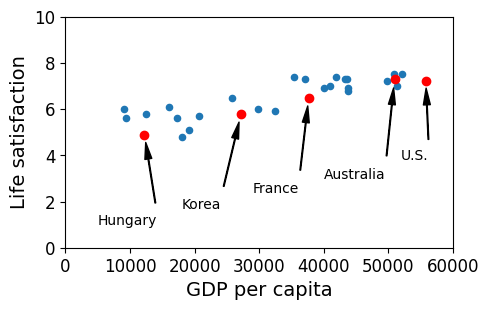

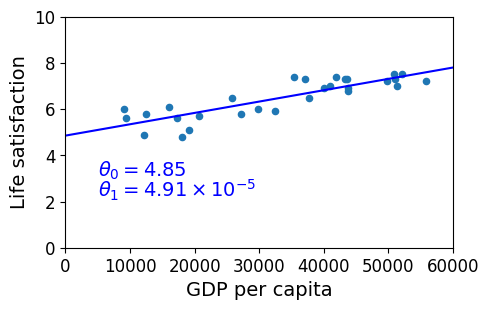

OK


In [5]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

### Qa) The $\theta$ parameters and the $R^2$ Score
 
The $\theta$ parameters, also refered to as weights or coefficients, can be adjusted during training to optimize the performance and acurracy of a certain linear regression model. 

Extrating the $\theta_0$ and $\theta_1$ coefficients can be done by using the below python attributes:

In [6]:
theta_0 = model.intercept_
theta_1 = model.coef_[0]

print("Theta_0 (Intercept):", theta_0)
print("Theta_1 (Coefficient):", theta_1)

Theta_0 (Intercept): [4.8530528]
Theta_1 (Coefficient): [4.91154459e-05]


 Another important variable is the $R^2$ score. 

The $R^2$ measures the goodness of fit of the model itself. The minimum and maximum values range from 0 to 1, where the below list describes each outcome:

- A value of 1: Considered a perfect fit, where the model accurately predicts the dependent variable based on the independent variables (Explains all the variance).
- A value of 0: The opposite of a perfect fit. This score indicates that the model's prediction is entirely wrong and provides no explanation.

While it is desirable to achieve a score of 1, it's important to note that such a score is highly unlikely as it's almost impossible to create a model that makes a perfect fit to real-world data.

Therefore, it is preferable to find a value close to 1, which, as explained, indicates a better fit.

In the assignment, the below calculation extracts the desirable score of 0.734.


In [7]:
score = model.score(X, y) 
print("Score:", score)

Score: 0.7344414355437031


### Qb) Using k-Nearest Neighbors

Instead of using linear regression, it will now be a k-nearest neighbour algorithm, here with k=3.

In [8]:
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [9]:
# Preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


X.shape= (29, 1)
y.shape= (29, 1)


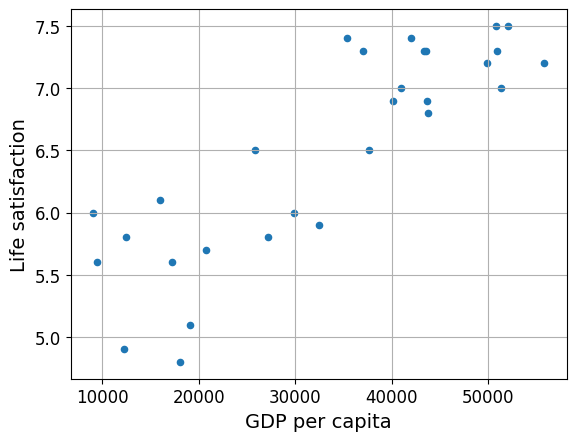

KNN prediction:  [[5.76666667]]
Linear regression prediction:  [[5.96242338]]
KKN score:  0.8525732853499179
Linear score:  0.7344414355437031


In [10]:
from sklearn.neighbors import KNeighborsRegressor

# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.grid(True)
plt.show()

# Select and train a model
knn = KNeighborsRegressor(n_neighbors=3)

# Train the new model
knn.fit(X, y) 


# Predictions for Cyprus 
print("KNN prediction: ", knn.predict(X_new))  
print("Linear regression prediction: ", lin1.predict(X_new))  

# Evaluating the models 
print("KKN score: ", knn.score(X, y))
print("Linear score: ", lin1.score(X, y))





As seen in the calculations above, the KNN prediction for Cyprus is 5.77, which is a bit less than the linear prediction of 5.96. 

KNN uses the score method of the coefficient of determination (R^2), as does the linear regression model. This means they are able to be compared, since they use the same scoring methods. 


The model used here is the "Regression based on k-nearest neighbors" (URL: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)








### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check




But that not the full story. Try plotting the prediction for both models in the same graph and tune the `k_neighbor` parameter of the `KNeighborsRegressor` model.  

Choosing `k_neighbor=1` produces a nice `score=1`, that seems optimal...but is it really so good?
- No, when score=1 it means that the model fits perfectly. Though this is true in some sense, it gives an obscured view. When k_neighbor=1 the model only considers a single nearest neighboor. Then the model doesn't consider the outliers in the data, and then we get a fragile model.  

Plotting the two models in a 'Life Satisfaction-vs-GDP capita' 2D plot by creating an array in the range 0 to 60000 (USD) (the `M` matrix below) and then predict the corresponding y value will sheed some light to this. 

Now reusing the plots stubs below, try to explain why the k-nearest neighbour with `k_neighbor=1` has such a good score.
- When there's only one neighbor, it will go directly from point to point. This will give the illusion that the model fits perfectly because it only has to consider 1 neighbor. On the other hand, when the model has to consider 3 neighbors, it tries to go to all of them, which is not possible. Then it makes a mean of the data. 

Does a score=1 with `k_neighbor=1`also mean that this would be the prefered estimator for the job?
- No, when the score is 1, it suggests that there's something wrong with the model or the way that the model is used. In this scenario, when the neighbor=1, the score is 1. This suggests that the model doesn't work as intended. There could be a lot of reasons why this is the case, but in this instance, it's because the neighbor=1.

Hint here is a similar plot of a KNN for a small set of different k's:

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/regression_with_knn.png"  alt="WARNING: could not get image from server." style="height:150px">

1.0


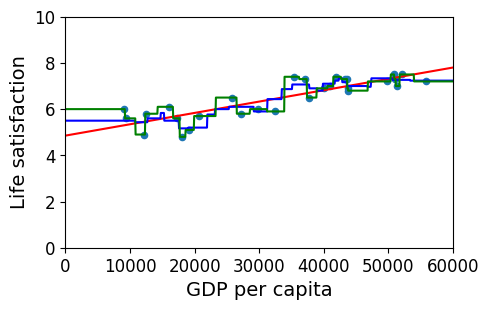

In [11]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = lin1.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
 
# Select and train a model with neighbor 1
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X, y) 
y_pred_knn1 = knn1.predict(M)    
plt.plot(m, y_pred_knn1, "g")
print(knn1.score(X, y))

### Qd) Trying out a Neural Network

Let us then try a Neural Network on the data, using the fit-predict interface allows us to replug a new model into our existing code.

There are a number of different NN's available, let's just hook into Scikit-learns Multi-Layer Perceptron for regression, that is an 'MLPRegressor'. 

Now, the data-set for training the MLP is really not well scaled, so we need to tweak a lot of parameters in the MLP just to get it to produce some sensible output: with out preprocessing and scaling of the input data, `X`, the MLP is really a bad choice of model for the job since it so easily produces garbage output. 

Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

Can the `MLPRegressor` score function be compared with the linear and KNN-scores?

Iteration 1, loss = 290434295.23044360
Iteration 2, loss = 286926974.91845930
Iteration 3, loss = 283445091.80120462
Iteration 4, loss = 279989007.88284469
Iteration 5, loss = 276559070.05886549
Iteration 6, loss = 273155609.32856685
Iteration 7, loss = 269778940.07033998
Iteration 8, loss = 266429359.38609853
Iteration 9, loss = 263107146.52031821
Iteration 10, loss = 259812562.35816029
Iteration 11, loss = 256545849.00610605
Iteration 12, loss = 253307229.45747611
Iteration 13, loss = 250096907.34413815
Iteration 14, loss = 246915066.77466321
Iteration 15, loss = 243761872.25819016
Iteration 16, loss = 240637468.71230754
Iteration 17, loss = 237541981.55239332
Iteration 18, loss = 234475516.85906240
Iteration 19, loss = 231438161.61967906
Iteration 20, loss = 228429984.03930050
Iteration 21, loss = 225451033.91592681
Iteration 22, loss = 222501343.07455081
Iteration 23, loss = 219580925.85422322
Iteration 24, loss = 216689779.64216983
Iteration 25, loss = 213827885.44891003
Iteration

Iteration 430, loss = 2916.92256554
Iteration 431, loss = 2784.88221707
Iteration 432, loss = 2658.56911979
Iteration 433, loss = 2537.74675644
Iteration 434, loss = 2422.18783348
Iteration 435, loss = 2311.67394546
Iteration 436, loss = 2205.99525065
Iteration 437, loss = 2104.95015746
Iteration 438, loss = 2008.34502139
Iteration 439, loss = 1915.99385218
Iteration 440, loss = 1827.71803087
Iteration 441, loss = 1743.34603649
Iteration 442, loss = 1662.71318200
Iteration 443, loss = 1585.66135934
Iteration 444, loss = 1512.03879319
Iteration 445, loss = 1441.69980322
Iteration 446, loss = 1374.50457461
Iteration 447, loss = 1310.31893646
Iteration 448, loss = 1249.01414804
Iteration 449, loss = 1190.46669240
Iteration 450, loss = 1134.55807732
Iteration 451, loss = 1081.17464325
Iteration 452, loss = 1030.20737799
Iteration 453, loss = 981.55173806
Iteration 454, loss = 935.10747635
Iteration 455, loss = 890.77847592
Iteration 456, loss = 848.47258987
Iteration 457, loss = 808.101486

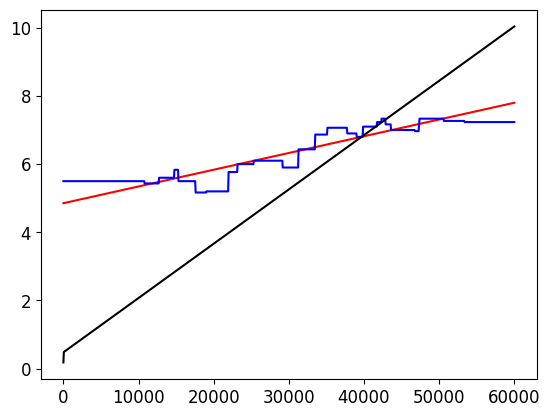

In [12]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

print(mlp.score(X, y))

### Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

We have trained the mlp model, which changes each time the code is run because it's trained by a neural network now.
The neural network stops the training when it doesn't improve more than tol=0.000010 for 10 consecutive epochs.


### Can the `MLPRegressor` score function be compared with the linear and KNN-scores?
They can be compared since the score function is implemented in the same way. The result is way different from the score results of the linear and knn scores, which in this case means that the mlp model is worse at the prediction since the result (R^2) is negative. This means that the predicted values are performing worse than if you where to take the average value of the data as a prediction. (Læs lige op på det her?)


## L01 - Modules and Packages in Python

#### Qa) Load and test the `libitmal` module

Here, we import the libitmal module from utils, which was given in the assignment. We print its directory and its content, and lastly call its TestAll() method.

In [13]:
import numpy as np
from libitmal import utils as itmalutils

print(dir(itmalutils))
print(itmalutils.__file__)

itmalutils.TestAll()

['AssertInRange', 'CheckFloat', 'DToXy', 'GenerateConfusionMatrix', 'GenerateResults', 'InRange', 'Iterable', 'ListToMatrix', 'ListToVector', 'PrintMatrix', 'ResetRandom', 'ShowResult', 'TEST', 'TestAll', 'TestCheckFloat', 'TestPrintMatrix', 'TestVarName', 'VarName', 'XyToD', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'ctxlib', 'inf', 'inspect', 'isFloat', 'isList', 'isNumpyArray', 'nan', 'np', 'random', 're', 'sklearn']
c:\Users\Thomas\Documents\GitHub\5-Semester\MAL\L01\libitmal\utils.py
TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


#### Qb) Create your own module, with some functions, and test it

Here we will import our own module named `extraUtils`. The module is imported from `coolModule`, where its functions now becomes available.

In this example, the `printNogetSejt()` is used to print a predfined text along with a given parameter string

In [14]:
from extraUtils import coolModule as module

module.printNogetSejt("Thomas")

print(module.__file__)

hej med dig: Thomas
c:\Users\Thomas\Documents\GitHub\5-Semester\MAL\L01\extraUtils\coolModule.py


#### Qc) How do you 'recompile' a module?

When changing the module code, Jupyter will keep running on the old module. How do you force the Jupyter notebook to re-load the module changes? 

You can force a reload of a module by using the `reload()` function from the `importlib` module.

In [15]:
from importlib import reload
from extraUtils import coolModule as module   

reload(module)

<module 'extraUtils.coolModule' from 'c:\\Users\\Thomas\\Documents\\GitHub\\5-Semester\\MAL\\L01\\extraUtils\\coolModule.py'>

It is also possible to automatically reload modules before executing code by using magic commands such as `%load_ext` and `%autoreload`

Source: https://saturncloud.io/blog/jupyter-notebook-reload-module-a-comprehensive-guide/

In [16]:
%load_ext autoreload
%autoreload 2

#### Qe) Extend the class with some public and private functions and member variables 


Below, the class MyClass has been defined with both a private and a public function. 

Private funtions are defined by the two prefixed underscores (__), while member variables are defined by the "self." annotation. This self in python classes represents an instance of the class, therefor making it possible to access methods and attributes inside the class itself. 

In [17]:
class MyClass:
    # Public function 
    def myfun():
        # Member variable 
        self.myvar = "blah"
        print(f"This is a message inside the class, myvar={self.myvar}.")
        
        # Private function 
    def __private_function(self):
        self.asdf = "asdf"
        print(f"This is a private function, {self.asdf}.")
        
    def something():
        print("Something")
        

Now an instance of the class is created. 

In [18]:
myObjectx = MyClass()

When trying to call a function with the self parameter missing, it throws an error, because the program is passing it an instance of a class, but it doesn't take one. 

In [19]:
myObjectx.something()

TypeError: MyClass.something() takes 0 positional arguments but 1 was given

When trying to call the private function, it fails because there is no function available called __private_function() 

In [ ]:
myObjectx.__private_function() 

AttributeError: 'MyClass' object has no attribute '__private_function'

If one wants to use a method with a self parameter, one needs to call it with the class directly and not an instance of the class. 

In [ ]:
MyClass.something() 

#### Qf) Extend the class with a Constructor


Below is shown how to define a constructor in a Python class, namely the \_\_init\_\_ function. 
This function will be called every time a class is instantiated. 



In [ ]:
class myClass:
    def __init__(self):
        self.att1 = 2
        self.att2 = 3
        self.att3 = 4
        

As well as a constructor, it is also possible to make a destructor in a Python class. Below it is shown how this \_\_del\_\_ function is defined in a class. 


The destructor function is not necessary in Python, since the language has garbage collection which handles the memory management automatically. 
So a detructor is not strictly necessary, except if you want to handle the memory management yourself.




In [ ]:
class myClass: 
    def __del__(self):
        print("The object has been deleted!")

By calling the destructor on an instance of the class, it will delete the object. 

In [ ]:
myobejctx = myClass() 
del myobejctx

The object has been deleted!


#### Qg) Extend the class with a to-string function


... 
MISSING 

## L02 - Cost function

#### Qa) Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

Using numpy the design matrix is being constructed

In [20]:
import numpy as np

y = np.array([1,2,3,4]) 

x1 = np.array([1,2,3])
x2 = np.array([4,2,1])
x3 = np.array([3,8,5])
x4 = np.array([-9,-1,0])

X = np.array([x1, x2, x3, x4])

print(X)

[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


#### Qb) Implement the L1 and L2 norms for vectors in python.

The norm functions `L1` and `L2` are being implemented, where we assert and validate the output of the function. The functions will be used later in the assignment.

In [32]:
import math

def checkInputIsOneDimensional(x):
    assert x.shape[0]>=0 
    if not x.ndim==1:
        raise ValueError
    
def checkInputSameShape(y_pred, y_true):
    assert y_pred.shape == y_true.shape, "Shape of input is not equal!"

def L1(x):
    checkInputIsOneDimensional(x) #Check if parameter is good
    sum = 0
    for i in x:
        sum = sum + (i**2)**0.5  
    return sum

def L2(x):
    checkInputIsOneDimensional(x) #Check if parameter is good
    sum = 0
    for i in x:
        sum = sum + (i**2)
    sum = sum**0.5
    return sum

def L2Dot(x):
    checkInputIsOneDimensional(x) #Check if parameter is good
    sum = np.sqrt(np.dot(x,x))  
    return sum  
     
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9  
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")
 
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


#### Qc) Construct the Root Mean Square Error (RMSE) function 

In [22]:
def RMSE(y_pred, y_true):
    checkInputSameShape(y_pred, y_true)
    sum = L2(y_pred - y_true)*0.5 #Implementation of the RMSE
    return sum

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]
 
r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


#### Qd) Similar construct the Mean Absolute Error (MAE) function 

We already created the `RMSE` function in the previous task, and now we will implement the MAE function to calculate the norm of L1 (instead of L2)

In [23]:
def MAE(y_pred, y_true):
    checkInputSameShape(y_pred, y_true)
    sum = L1(y_pred-y_true)/y_pred.size
    return sum  

r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

MAE=3.75, diff=0.0
OK


#### Qe) Robust Code 

We have added error checking code by using assertions, that checks for right y^-y sizes of the MSE and MAE functions (the shape of their input)

#### Qf) Conclusion

## L02 - Dummy classifier

#### Qa) Load and display the MNIST data

The function MNIST_GetDataSet() will be implemented by using the fetch_openml function from sklearn.datasets. The parameters of this function will be found by looking at the documentation https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html.

The parameters that is needed to be changed from default values:

`name: str` -> 

`version: int` ->

`return_X_y: bool` ->

`cache: bool` ->

`as_frame: bool` -> We are using numpy

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' ... '4' '5' '6']


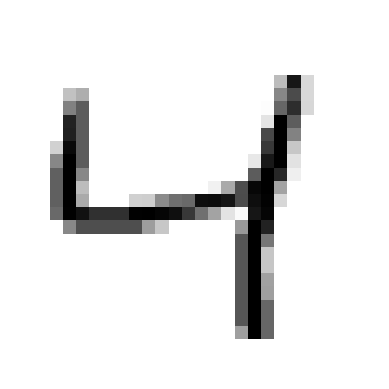

In [24]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

def MNIST_GetDataSet():
    X, y = fetch_openml(name='mnist_784', version=1, data_home="./data", cache=True, return_X_y = True, as_frame=False)
    X = X/255
    return X,y

def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

X,y = MNIST_GetDataSet()

print(X)
print(y)

# Sejt -- y[2] er 4 og x[2] er også 4 hehe
MNIST_PlotDigit(X[2])

#### Qb)  Add a Stochastic Gradient Decent [SGD] Classifier

X.shape=(70000, 784)
X.shape=(70000, 784)

---- Correct categorized fives:
Is it a 5?: False


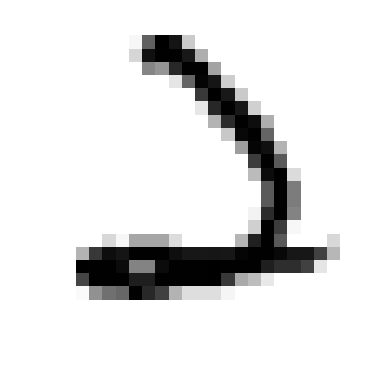

Is it a 5?: False


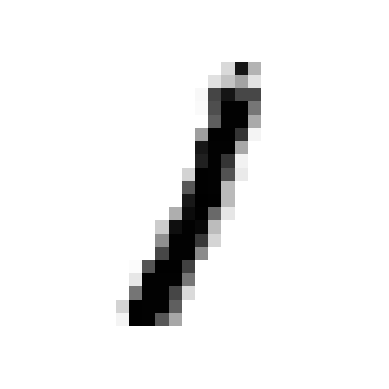


---- Incorrect categorized fives
Is it a 5?: False


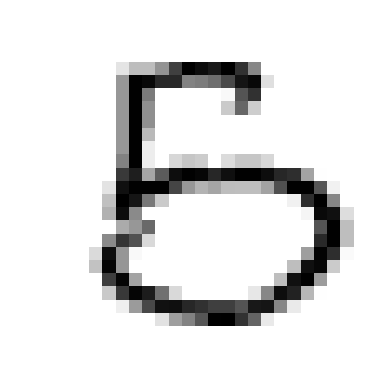

Is it a 5?: False


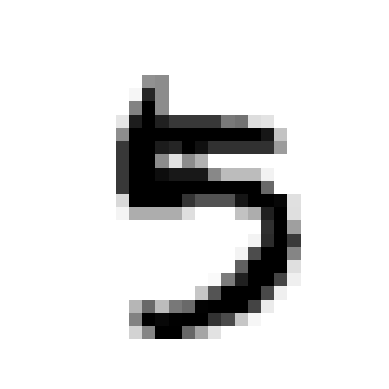

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np

X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")

SGD_classifier = SGDClassifier(random_state=42)

SGD_classifier.fit(X_train, y_train_5)

y_pred = SGD_classifier.predict(X_test)

categorized = np.where(y_pred == y_test_5)[0]

not_correctly_categorized = np.where(y_pred != y_test_5)[0]

print("\n---- Correct categorized fives:")

for number in categorized[:2]:
    MNIST_PlotDigit(X_test[number])
    predicted_value = SGD_classifier.predict([X_test[number]])
    print(f"Is it a 5?: {predicted_value[0]}")
    plt.show()
    
print("\n---- Incorrect categorized fives")

for number in not_correctly_categorized[:2]:
    MNIST_PlotDigit(X_test[number])
    predicted_value = SGD_classifier.predict([X_test[number]])
    print(f"Is it a 5?: {predicted_value[0]}")
    plt.show()
    

#### Qc) Implement a dummy binary classifier

In [26]:
from sklearn.metrics import accuracy_score

class DummyClassifier():
    def fit(self, X, y=None):
        pass # Dummy classifier doesn't fit
    
    def predict(self, X):
        return [0] * len(X) # Writes 0 in every index
    
def calculate_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)
    

dummyClassifier = DummyClassifier()

dummyClassifier.fit(X_train)

y_pred = dummyClassifier.predict(X_test)

accuracy = calculate_accuracy(y_test_5, y_pred)

print(accuracy) # The accuracy will be around 90%, this is a fake accuracy


0.9121428571428571


#### Qd) Conclusion

## L02 - Performance metrics


#### Qa) Implement the Accuracy function and test it on the MNIST data.

In [27]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import matplotlib
import matplotlib.pyplot as plt

def MNIST_GetDataSet():
    X, y = fetch_openml(name='mnist_784', version=1, data_home="./data", cache=True, return_X_y = True, as_frame=False)
    X = X/255
    return X,y

class DummyClassifier():
    def fit(self, X, y=None):
        pass # Dummy classifier doesn't fit
    
    def predict(self, X):
        return [0] * len(X) # Writes 0 in every index

def MyAccuracy(y_true, y_pred):
    matches = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            matches += 1
    return(matches/len(y_pred))

    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
   a0=MyAccuracy(y_true, y_pred)
   a1=accuracy_score(y_true, y_pred)

   print(f"my a          ={a0}")
   print(f"scikit-learn a={a1}")

   # do some numerical comparison here, like
   #  if fabs(a0-a1)<eps then ..


X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")

SGD_classifier = SGDClassifier(random_state=42)

SGD_classifier.fit(X_train, y_train_5)

y_pred = SGD_classifier.predict(X_test)


dummyClassifier = DummyClassifier()

dummyClassifier.fit(X_train)

dummy_y_pred = dummyClassifier.predict(X_test)

# Test accuracy of dummy
print("\nAccuracy of dummy classifier:")
TestAccuracy(y_test_5, dummy_y_pred)

#Test accuracy of SGD_classifiet
print("\nAccuracy of SGD classifier:")
TestAccuracy(y_test_5, y_pred)


X.shape=(70000, 784)
X.shape=(70000, 784)

Accuracy of dummy classifier:
my a          =0.909
scikit-learn a=0.909

Accuracy of SGD classifier:
my a          =0.9752857142857143
scikit-learn a=0.9752857142857143


#### Qb) Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

def MyPrecision(y_true, y_pred):
    TP = 0
    FP = 0
    for i in range(len(y_pred)):
        if y_pred[i] == True and y_true[i] == True:
            TP += 1
    
    for i in range(len(y_pred)):
        if y_pred[i] == True and y_true[i] == False:
            FP += 1

    if TP == 0 or FP == 0:
        return 0
            
    return(TP/(TP+FP))
            

def MyRecall(y_true, y_pred):
    TP = 0
    FN = 0
    for i in range(len(y_pred)):
        if y_pred[i] == True and y_true[i] == True:
            TP += 1
            
    for i in range(len(y_pred)):
        if y_pred[i] == False and y_true[i] == True:
            FN += 1
    if TP == 0 or FN == 0:
        return 0
    return(TP/(TP+FN))        
    
    
def MyF1Score(y_true, y_pred):
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_pred, y_true)
    if precision == 0 or recall == 0:
        return 0
    return(2 * precision * recall)/(precision + recall)

y_pred1 = [True, True, True, True]
y_true1 = [True, True, True, False]

y_pred2 = [True, True, False, True]
y_true2 = [True, True, True, False]

def test(y_true, y_pred):
    p0 = MyPrecision(y_true, y_pred)
    p1 = precision_score(y_true, y_pred)
    
    r0 = MyRecall(y_true, y_pred)
    r1 = recall_score(y_true, y_pred)
    
    f0 = MyF1Score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"This is my precision: {p0}")
    print(f"This is scikit precision: {p1}")
    
    print(f"This is my recall: {r0}")
    print(f"This is scikit recall: {r1}")
    
    print(f"This is my f1-score: {f0}")
    print(f"This is scikit f1-score: {f1}\n\n")
    
test(y_true1, y_pred1)
test(y_true2, y_pred2)
test(y_test_5, y_pred)
test(y_test_5, dummy_y_pred)

This is my precision: 0.75
This is scikit precision: 0.75
This is my recall: 0
This is scikit recall: 1.0
This is my f1-score: 0.75
This is scikit f1-score: 0.8571428571428571


This is my precision: 0.6666666666666666
This is scikit precision: 0.6666666666666666
This is my recall: 0.6666666666666666
This is scikit recall: 0.6666666666666666
This is my f1-score: 0.6666666666666666
This is scikit f1-score: 0.6666666666666666


This is my precision: 0.8879598662207357
This is scikit precision: 0.8879598662207357
This is my recall: 0.8335949764521193
This is scikit recall: 0.8335949764521193
This is my f1-score: 0.8879598662207357
This is scikit f1-score: 0.8599190283400809


This is my precision: 0
This is scikit precision: 0.0
This is my recall: 0
This is scikit recall: 0.0
This is my f1-score: 0
This is scikit f1-score: 0.0




C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Qc) The Confusion Matrix


In [29]:
from sklearn.metrics import confusion_matrix

cm_dummy = confusion_matrix(y_test_5, dummy_y_pred)
cm_sdg_classifier = confusion_matrix(y_test_5, y_pred)
cm_sdg_classifier_reversed = confusion_matrix(y_pred, y_test_5)

print(f"Dummy maxtrix:\n{cm_dummy}\n")
print(f"SDG matrix:\n{cm_sdg_classifier}\n")
print(f"Reversed SDG matrix:\n{cm_sdg_classifier_reversed}\n")

Dummy maxtrix:
[[12726     0]
 [ 1274     0]]

SDG matrix:
[[12592   134]
 [  212  1062]]

Reversed SDG matrix:
[[12592   212]
 [  134  1062]]



#### Qd) A Confusion Matrix Heat-map


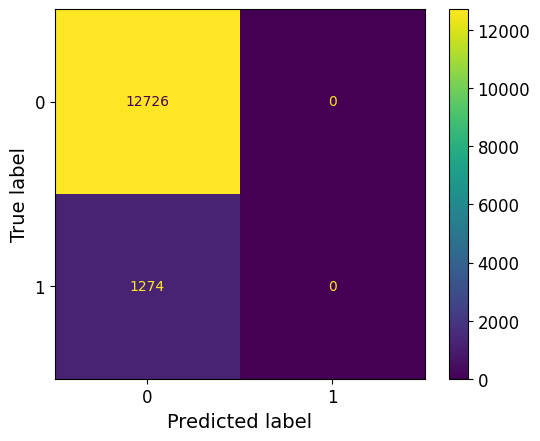

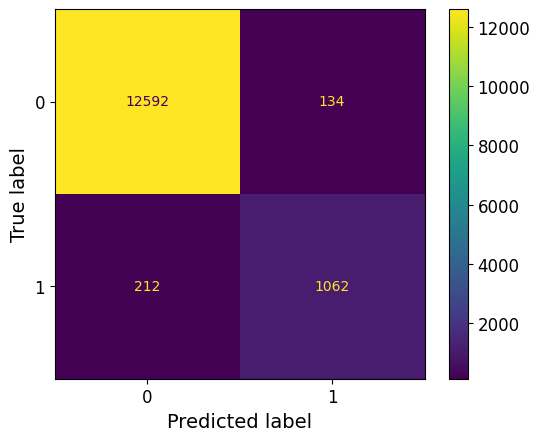

In [30]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


dummy_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_dummy) 
dummy_matrix.plot()
plt.show()

SGD_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_sdg_classifier)
SGD_matrix.plot()
plt.show()

### Qe) Conclusion
